# K-Means with PCA

This process is almost identical to the kmeans method, but instead, we use dimension reduction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final/past_ten_seasons/data/cleaned.csv")

In [2]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# X = df[['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS', 'FG%', '2P%',
#        '3P%', 'FT%', 'TS%', 'eFG%']]

X = df[['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS']]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the selected variables
X_scaled = scaler.fit_transform(X)

Here we determine the explained variance by number of principal components. It is gernerally accepted that 80% variance is the target which can be accomplished here with 3 principal components.

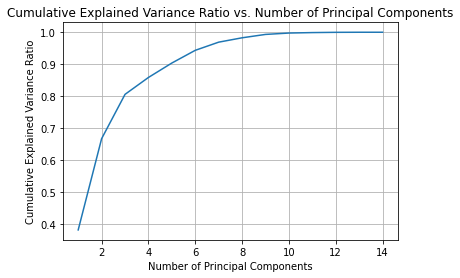

In [3]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA().fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

In [4]:
n_components = 3  # Choose the optimal number of components based on your analysis

# Create a PCA object with the optimal number of components
pca = PCA(n_components=n_components)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

In [5]:
# # Split the PCA-transformed data into training and testing sets
# X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

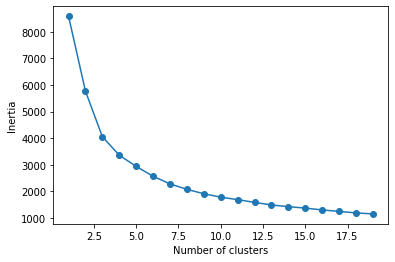

In [6]:
# Find the optimal number of clusters using the elbow method
n_clusters = np.arange(1, 20)
inertia_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia_scores.append(kmeans.inertia_)

plt.plot(n_clusters, inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In this case, 10 clusters seems to be the best number of clusters.

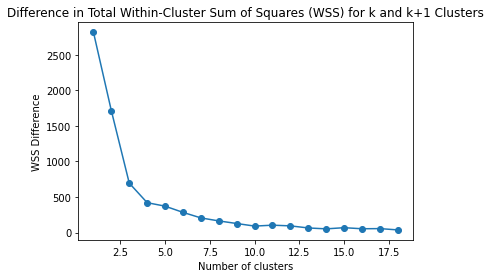

In [7]:
wss_difference = np.diff(inertia_scores) * -1

plt.plot(n_clusters[:-1], wss_difference, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS Difference')
plt.title('Difference in Total Within-Cluster Sum of Squares (WSS) for k and k+1 Clusters')
plt.show()

In [8]:
# Choose the optimal number of clusters based on your analysis
optimal_n_clusters = 8  # Modify this value based on the elbow method

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.predict(X_pca)
# cluster_labels_test = kmeans.predict(X_pca)

In [9]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the PCA-transformed data
X_pca_clustered = np.column_stack((X_pca, cluster_labels))

# Convert the numpy array to a DataFrame
df_pca_clustered = pd.DataFrame(X_pca_clustered, columns=['PC1', 'PC2', 'PC3', 'Cluster'])

# Plot scatterplots for all clusters
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2', 'PC3'])
centers_df['Cluster'] = centers_df.index + 1

centers_melted = centers_df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

In [10]:
# # Get cluster labels
# cluster_labels = kmeans.labels_

# # Add cluster labels to the PCA-transformed data
# X_pca_clustered = np.column_stack((X_pca, cluster_labels))

# # Convert the numpy array to a DataFrame
# df_pca_clustered = pd.DataFrame(X_pca_clustered, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster'])

# # Plot scatterplots for all clusters
# centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# centers_df['Cluster'] = centers_df.index + 1

# centers_melted = centers_df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

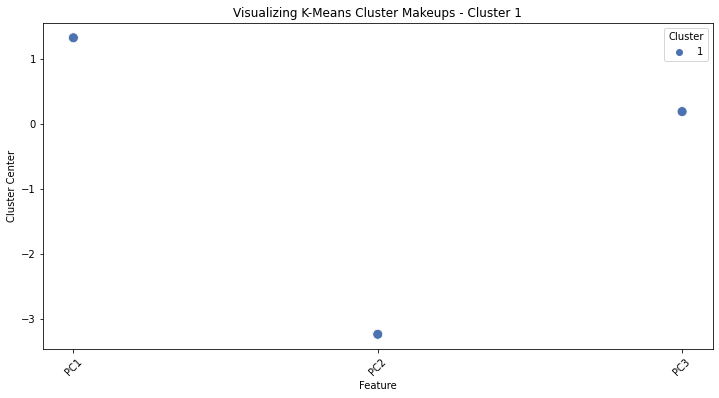

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=centers_melted[centers_melted['Cluster'] == 1], x='Feature', y='Value', hue='Cluster', palette='deep', s=100)
plt.xticks(rotation=45)
plt.title("Visualizing K-Means Cluster Makeups - Cluster 1")
plt.xlabel("Feature")
plt.ylabel("Cluster Center")
plt.legend(title='Cluster', loc='upper right')
plt.show()

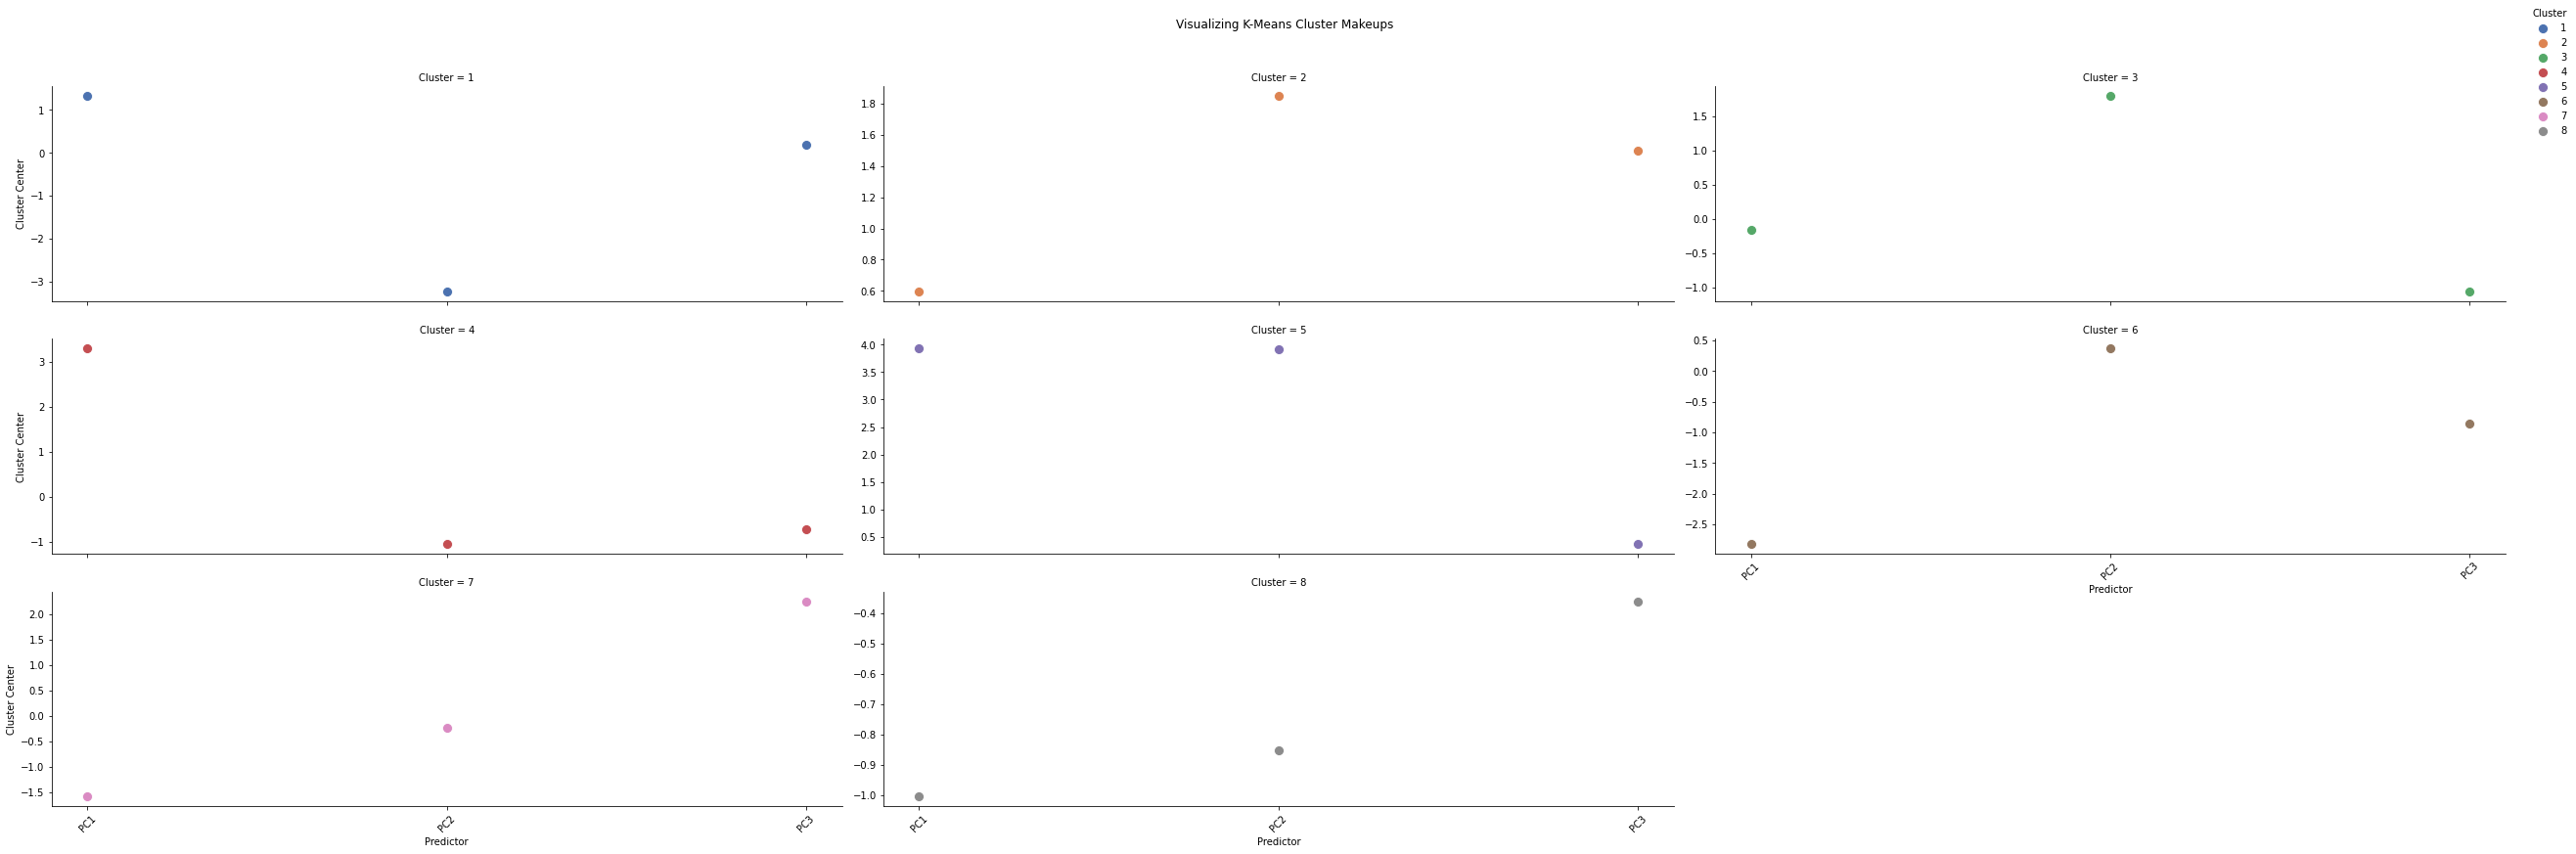

In [12]:
# Plot scatterplots for all clusters
g = sns.FacetGrid(centers_melted, col='Cluster', col_wrap=3, hue='Cluster', palette='deep', sharey=False, height=4, aspect=3)
g.map_dataframe(sns.scatterplot, x='Feature', y='Value', s=100)
g.set_xticklabels(rotation=45)

g.set_axis_labels("Predictor", "Cluster Center")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Visualizing K-Means Cluster Makeups")
g.add_legend(title='Cluster', loc='upper right')

plt.show()

Here, we can visualize the first two principal components with a scatter plot of every cluster seperately and then together.

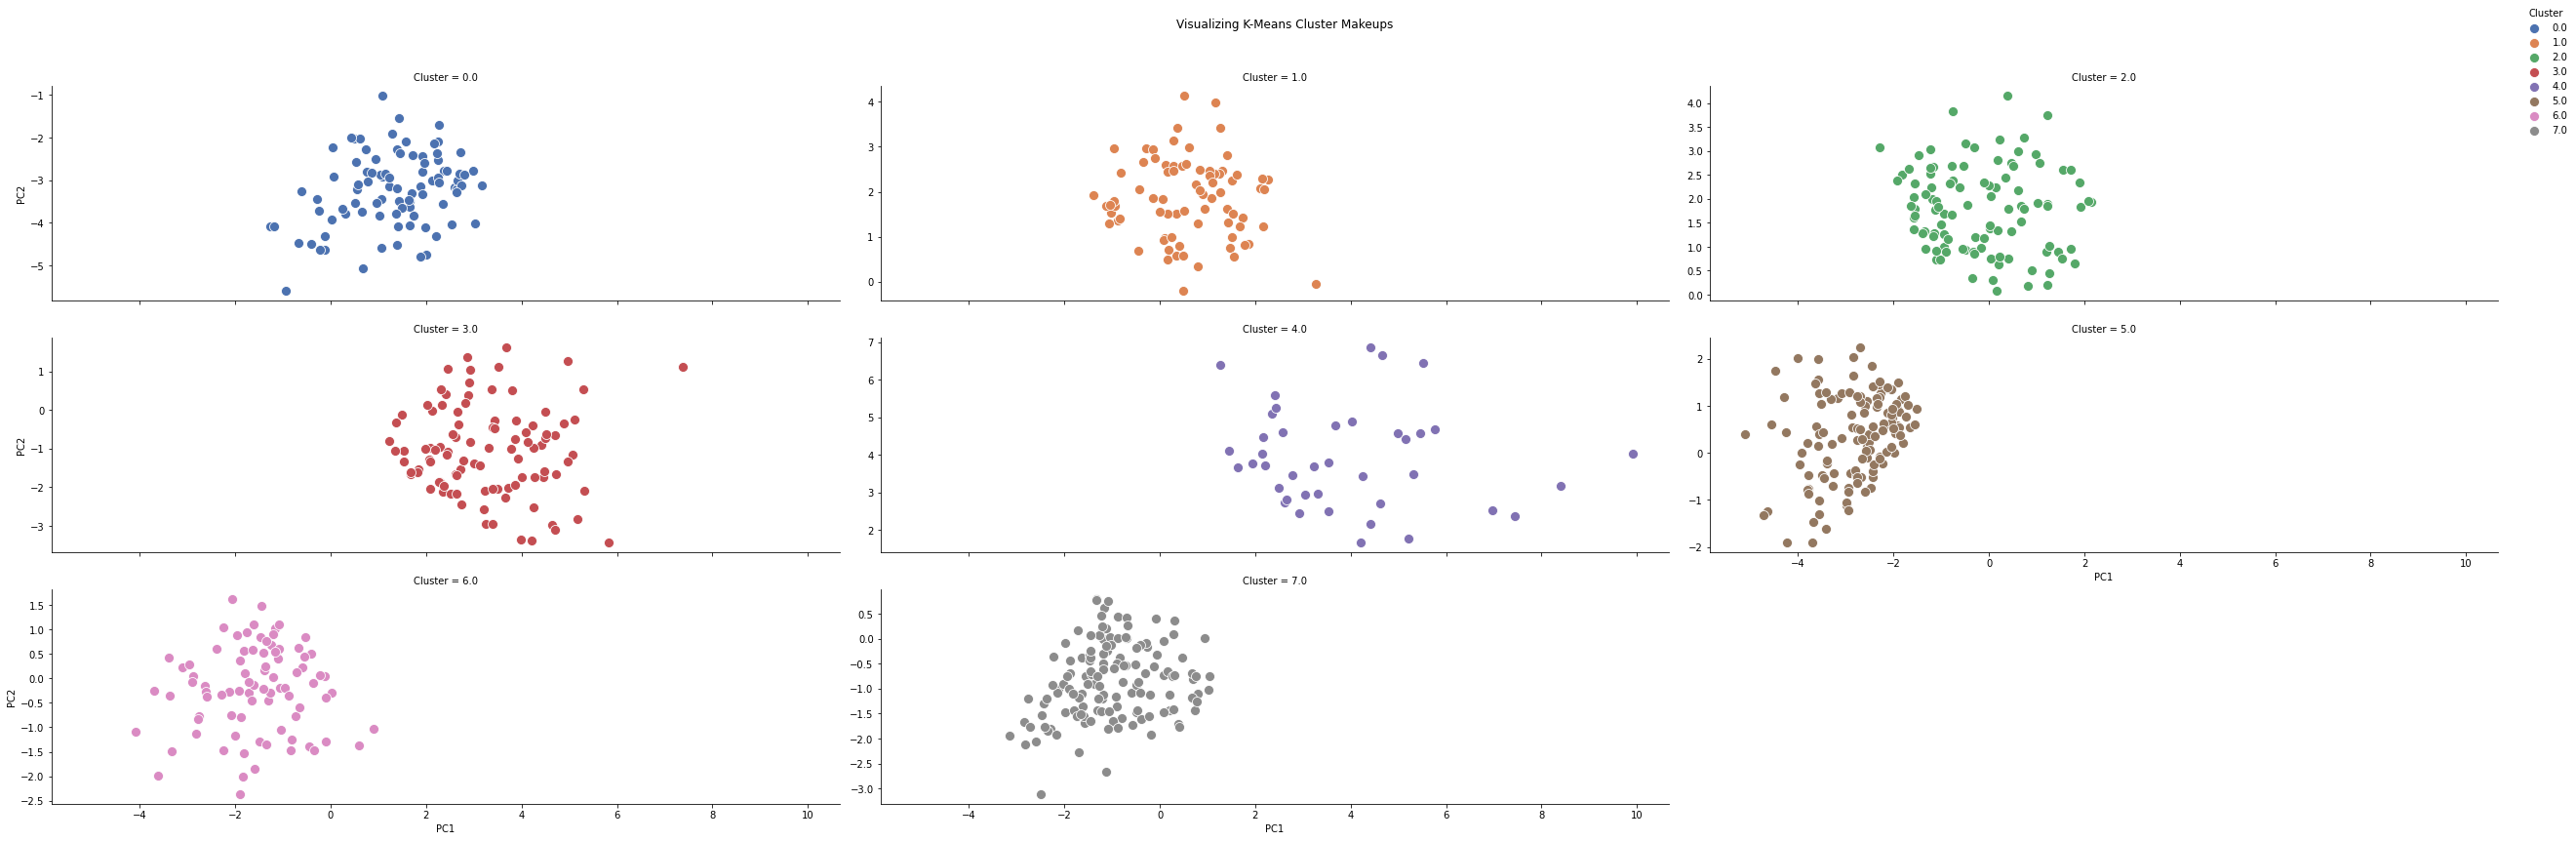

In [13]:
g = sns.FacetGrid(df_pca_clustered, col='Cluster', col_wrap=3, hue='Cluster', palette='deep', sharey=False, height=4, aspect=3)
g.map_dataframe(sns.scatterplot, x='PC1', y='PC2', s=100)
g.set_axis_labels("PC1", "PC2")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Visualizing K-Means Cluster Makeups")
g.add_legend(title='Cluster', loc='upper right')

plt.show()

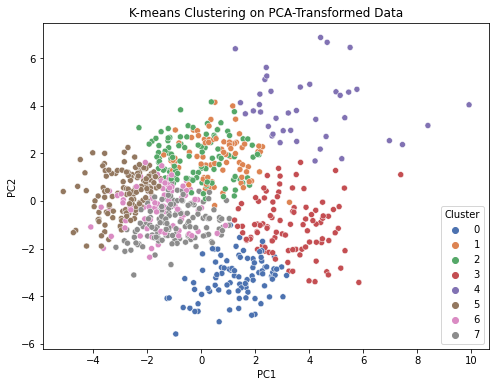

In [14]:
# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df['Cluster'] = cluster_labels

# Create a scatter plot of the first two principal components, colored by cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.show()

In [15]:
# Add cluster labels to the original dataset
df['Cluster (kmeans_PCA)'] = kmeans.labels_

# View the players in each cluster
for i in range(optimal_n_clusters):
    print(f"Players in Cluster {i+1}:")
    print(df[df['Cluster (kmeans_PCA)'] == i]['Player'].values)
    print()

Players in Cluster 1:
['Brandan Wright' 'Robert Williams' 'Trendon Watford' 'Noah Vonleh'
 'Jan Veselý' 'Anderson Varejão' 'Jarred Vanderbilt' 'Ekpe Udoh'
 'Ronny Turiaf' 'Xavier Tillman Sr.' 'Tristan Thompson' 'Jason Thompson'
 'Daniel Theis' 'Greg Stiemsma' 'Isaiah Stewart' 'Greg Smith'
 'Jericho Sims' 'Larry Sanders' 'Robert Sacre' 'Thomas Robinson'
 'Mitchell Robinson' 'Willie Reed' 'Ivan Rabb' 'Dwight Powell'
 'Jakob Poeltl' 'Miles Plumlee' 'Mason Plumlee' 'Kendrick Perkins'
 'Adreian Payne' 'Zaza Pachulia' 'Onyeka Okongwu' 'Emeka Okafor'
 "Kyle O'Quinn" 'Lucas Nogueira' 'Nerlens Noel' 'Joakim Noah'
 'Larry Nance Jr.' 'Timofey Mozgov' 'Jason Maxiell' 'Ian Mahinmi'
 'Robin Lopez' 'Kevon Looney' 'Kosta Koufos' 'Michael Kidd-Gilchrist'
 'DeAndre Jordan' 'Damian Jones' 'Amir Johnson' 'Roy Hibbert'
 'John Henson' 'Brendan Haywood' 'Chuck Hayes' 'Udonis Haslem'
 'Isaiah Hartenstein' 'Marcin Gortat' 'Taj Gibson' 'Usman Garuba'
 'Kevin Garnett' 'Daniel Gafford' 'Wenyen Gabriel' 'Joel Free

In [16]:
# features = ['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS', 'FG%', '2P%',
#        '3P%', 'FT%', 'TS%', 'eFG%']

features = ['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'PTS']

mean_values = df.groupby('Cluster (kmeans_PCA)')[features].mean()

In [17]:
from math import pi

def create_radar_chart(mean_values, features, clusters):
    # Set the number of variables and calculate the angle for each axis
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    # Set the radar chart figure
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Set the first axis on top and move clockwise
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines and labels
    plt.xticks(angles[:-1], features)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="gray", size=8)
    plt.ylim(0, 1)

    # Normalize the mean values to the range [0, 1]
    normalized_values = mean_values / mean_values.max().max()

    # Plot the radar chart for each cluster
    for i in range(clusters):
        values = normalized_values.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Cluster {i}")
        ax.fill(angles, values, alpha=0.25)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Mean values by attribute for each cluster")
    plt.show()

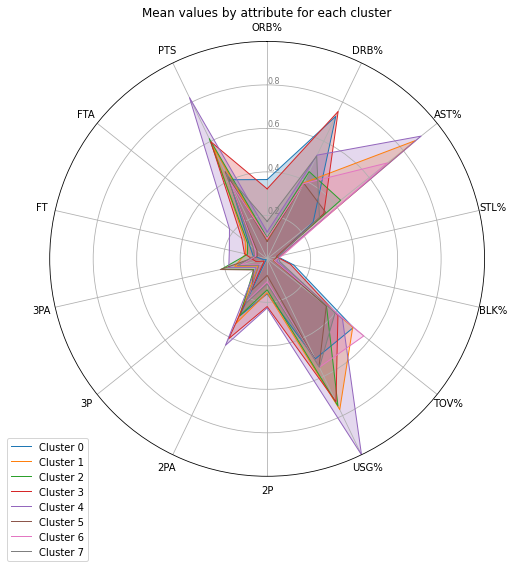

In [18]:
# Call the function to create the radar chart
create_radar_chart(mean_values, features, optimal_n_clusters)

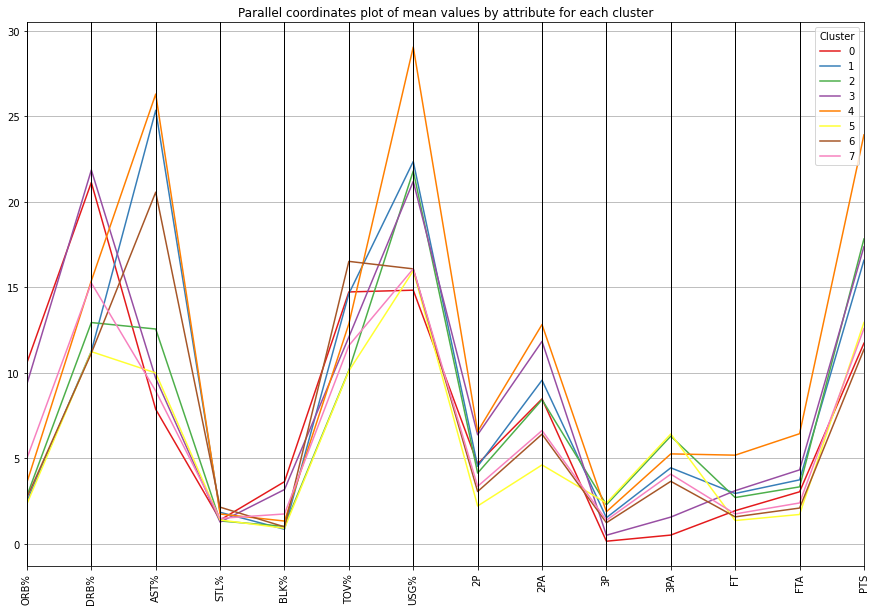

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def create_parallel_coordinates_plot(mean_values, features, clusters):
    # Create a new DataFrame with the cluster labels and mean values
    mean_values['cluster'] = mean_values.index
    mean_values = mean_values.reset_index(drop=True)

    # Set up the plot
    plt.figure(figsize=(15, 10))

    # Plot the parallel coordinates plot using pd.plotting.parallel_coordinates()
    pd.plotting.parallel_coordinates(mean_values, 'cluster', color=plt.cm.Set1.colors)

    # Customize the plot
    plt.title("Parallel coordinates plot of mean values by attribute for each cluster")
    plt.xticks(range(len(features)), features, rotation=90)
    plt.legend(title='Cluster', loc='upper right')

create_parallel_coordinates_plot(mean_values, features, optimal_n_clusters)
plt.show()

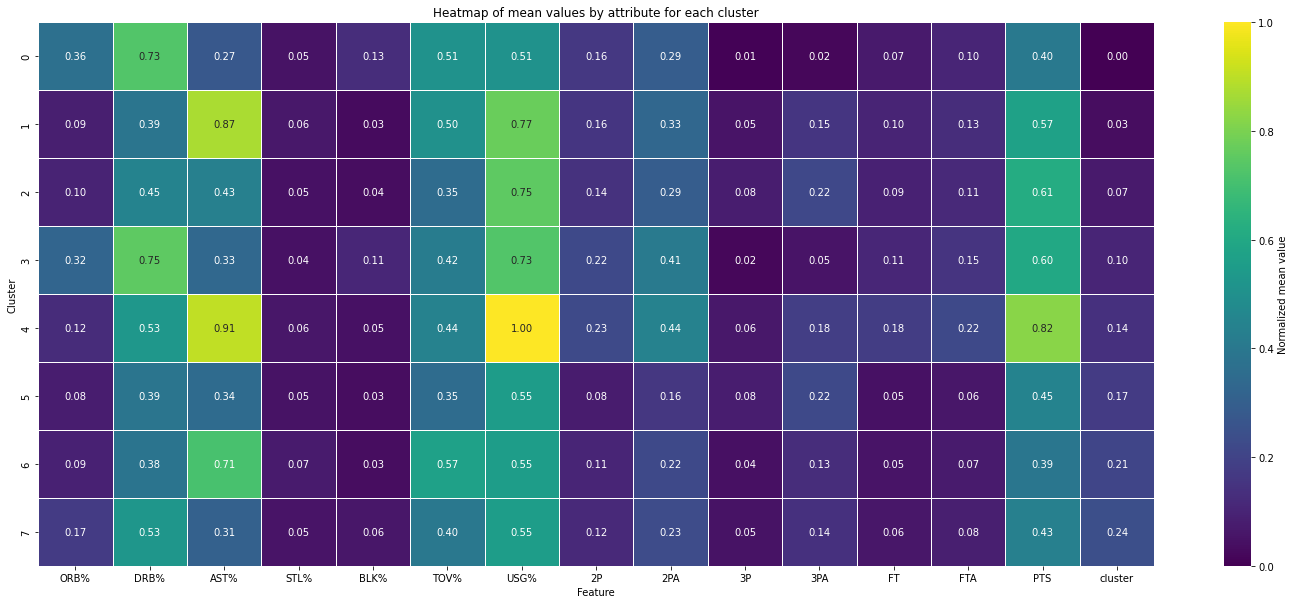

In [20]:
def create_heatmap(mean_values, features, clusters):
    # Normalize the mean values to the range [0, 1]
    normalized_values = mean_values / mean_values.max().max()

    # Plot the heatmap
    plt.figure(figsize=(25, 10))
    sns.heatmap(normalized_values, cmap="viridis", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Normalized mean value'})
    plt.title("Heatmap of mean values by attribute for each cluster")
    plt.xlabel("Feature")
    plt.ylabel("Cluster")
    plt.show()

# Call the function to create the heatmap
create_heatmap(mean_values, features, optimal_n_clusters)

Finally, because we are only using 3 principal components we can visualize this in 3D as well.

In [21]:
import plotly.graph_objs as go

# Create a trace for the 3D scatter plot
scatter3d_trace = go.Scatter3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create a layout for the 3D scatter plot
scatter3d_layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    ),
)

# Combine the trace and layout into a Figure object
scatter3d_fig = go.Figure(data=[scatter3d_trace], layout=scatter3d_layout)

# Display the 3D scatter plot
scatter3d_fig.show()

Next, we try Guassian Mixture.

Conclusions in README